<a href="https://colab.research.google.com/github/AniiEncalada/AED/blob/main/ProyectoAED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Nacional de Loja

**Carrera de Ingeniería en Sistemas**

Mayo - Septiembre del 2021 

**Laboratorio de Inteligencia Artificial: Proyecto de Análisis y Exploración de Datos**

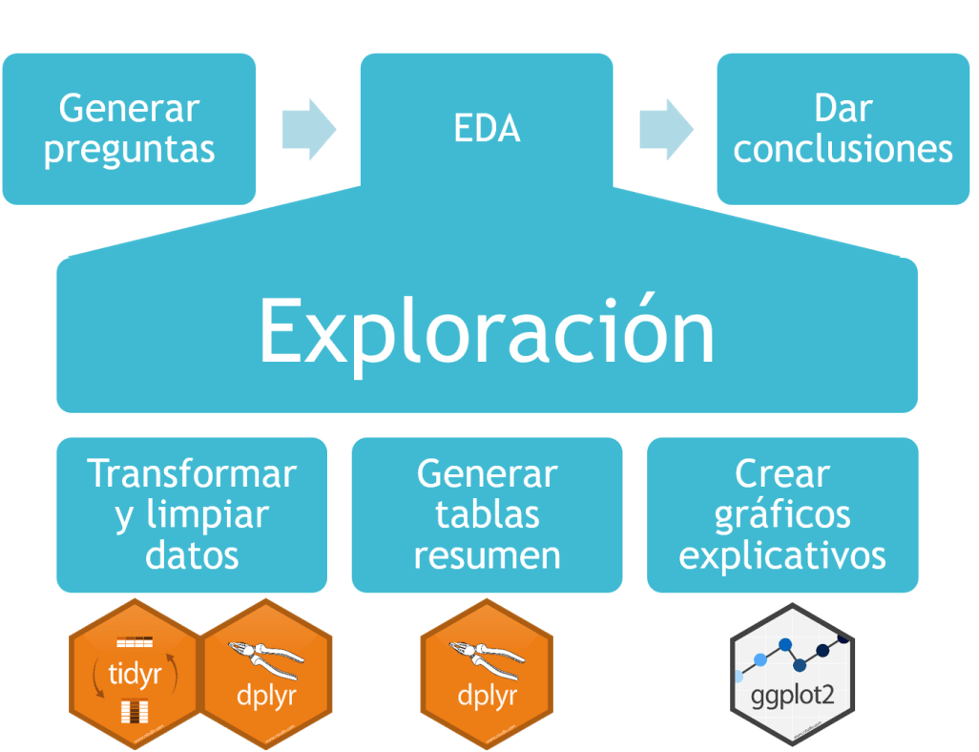

# **1. Introducción**



El presente trabajo consiste en una práctica de Analisis exploratorio de datos teniendo como referencia datos relacionados con los posts publicados durante el año 2014 en la página de Facebook de una conocida marca de cosméticos.
Este conjunto de datos contiene 500 de las 790 filas y parte de las características analizadas por Moro et al. (2016). Las restantes se omitieron por cuestiones de confidencialidad. Incluye 7 rasgos conocidos antes de la publicación y 12 rasgos para evaluar el impacto posterior. 

---



# **2. Fuente y descripción de datos**

[Enlace del repositorio con el que se va a trabajar el presente análisis](https://archive.ics.uci.edu/ml/datasets/Facebook+metrics) Los datos a ser analisados han sido extraidos del repositorio de Center for Machine Learning and Intelligent Systems UCI y sus características se presentan a continuación:

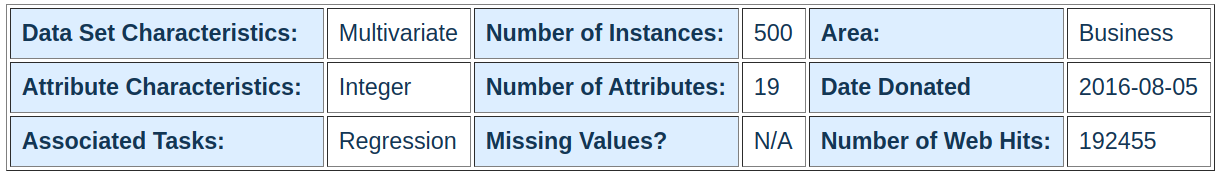

Este estudio presenta un enfoque de investigación que utiliza la minería de datos para predecir las métricas de rendimiento de los posts publicados en las páginas de Facebook de las marcas. Se modelaron doce métricas de rendimiento de posts extraídas de la página de una empresa de cosméticos que incluía 790
publicaciones, y los dos mejores resultados alcanzaron un porcentaje de error 
medio absoluto de alrededor del 27%. Uno de ellos, el modelo "Lifetime Post Consumers", se evaluó mediante un análisis de sensibilidad para entender cómo influía cada una de las siete características de entrada (categoría, total de likes de la página, tipo, mes, hora, día de la semana, pago). El tipo de contenido se consideró la característica más relevante para el modelo, con una relevancia del 36%. Una publicación de estado capta aproximadamente el doble de atención que los tres tipos restantes (enlace, foto, vídeo). Hemos extraído un flujo del proceso de decisión del modelo "Lifetime Post Consumers", que al complementar la información del análisis de sensibilidad puede servir de apoyo a las decisiones del gestor sobre la publicación de un post.
[Referencia](https://www.sciencedirect.com/science/article/abs/pii/S0148296316000813?via%3Dihub)

Para el análisis de datos se usará Python

In [ ]:
import pandas as pd #Para el manejo y analisis de estructuras de datos
import matplotlib.pyplot as plt #Para crear graficos en dos dimensiones
import numpy as np
import seaborn as sns #Para generar graficos  

%matplotlib inline
data = pd.read_csv('https://raw.githubusercontent.com/AniiEncalada/AED/main/dataset_Facebook.csv')
data.head(10)


,Total de likes,Tipo,Categoría,Mes de publicación,Semana de publicación,Hora de publicación,Pagado,Alcance total de publicación por vida,Impresiones totales de publicación por vida,Usuarios comprometidos de por vida,Consumidores totales por vida,Consumo de publicaciones de por vida,Impresiones de publicaciones en personas a las que le gusta la página,Alcance de publicaciones en personas a las que le gusta la página,Personas que les gusta la página y participan de publicación,Comentarios,Me gusta,Compartido,Total interacciones
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


Las variables que constan en el dataset servirán para un análisis del comportamiento de la audiencia de una página de facebook respecto a su contenido. Las variable son de tipo numérico en su mayoría

In [ ]:
#tipos de variables
data.dtypes

Total de likes                                                             int64
Tipo                                                                      object
Categoría                                                                  int64
Mes de publicación                                                         int64
Semana de publicación                                                      int64
Hora de publicación                                                        int64
Pagado                                                                   float64
Alcance total de publicación por vida                                      int64
Impresiones totales de publicación por vida                                int64
Usuarios comprometidos de por vida                                         int64
Consumidores totales por vida                                              int64
Consumo de publicaciones de por vida                                       int64
Impresiones de publicaciones

**Tipos de variables**
* Numéricas
  * Total de likes 
  * Alcance total de publicación por vida 
  * Impresiones totales de publicación por vida 
  * Usuarios comprometidos de por vida
  * Consumidores totales por vida 
  * Consumo de publicaciones de por vida
  * Impresiones de publicaciones en personas a las que le gusta la página 
  * Alcance de publicaciones en personas a las que le gusta la página
  * Personas que les gusta la página y participan de publicación 
  * Comentarios                                                                
  * Me gusta                                                                 
  * Compartido                                                               
  * Total interacciones  
* Ordinales
  * Mes de publicación
  * Semana de publicación
  * Hora de publicacición
* Categórica
  * Tipo 
  * Categoría 
  * Pagado

# **3. Estadísticos descriptivos**



¿La relación entre los comentarios y likes sobre alguna publicación responden a una distribución directamente proporcional?

## **3. 1 Análisis Univariado (numérico y gráfico)**

**Detalle de los datos** Se puede evidenciar una descripción general de los datos, condenando promedio, mínimo, máximo y cuartiles

In [ ]:
data.describe()

,Total de likes,Categoría,Mes de publicación,Semana de publicación,Hora de publicación,Pagado,Alcance total de publicación por vida,Impresiones totales de publicación por vida,Usuarios comprometidos de por vida,Consumidores totales por vida,Consumo de publicaciones de por vida,Impresiones de publicaciones en personas a las que le gusta la página,Alcance de publicaciones en personas a las que le gusta la página,Personas que les gusta la página y participan de publicación,Comentarios,Me gusta,Compartido,Total interacciones
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


### Total Likes en la página

En los datos obtenidos de la página se puede evidenciar el crecimiento de la página en cuanto a seguidores y gente a la que le gusta. Para mayor claridad de lo expuesto ¿cuál es la diferencia entre el mínimo y máximo del **Total de likes en la página**?

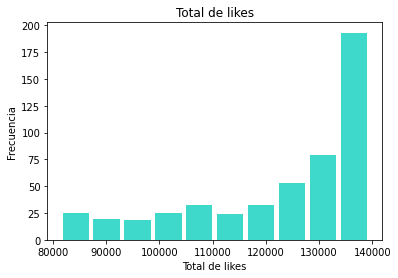

In [ ]:
data['Total de likes'].describe()
plt.hist(x=data['Total de likes'], color='#3ED9CA', rwidth=0.85)
plt.title('Total de likes')
plt.xlabel('Total de likes')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

In [ ]:
minimo = data['Total de likes'].min()
maximo = data['Total de likes'].max()
print("En crecimiento de los seguidores de la página ha sido de: "+ abs(maximo-minimo))

58071

El crecimiento en seguidores a sido de **58071**


### Tipo de publicación

**¿Qué tipo de publicación ha predominado en la página?**

Haciendo un análisis al **Tipo** de publicación que ha hecho con mayor frecuencia, conociendo que solo se han clasificado en 4 tipos: *Foto, Estado, Enlace y Vídeo*, se puede observar que el tipo “**Foto**” ha sido el más destacado por mucho entre otros tipos, ya que de 500 publicaciones **426** corresponden a este tipo, **45** corresponden a “**Estados**”, **22** a “**Enlaces**” y, solamente, **7** a “**Vídeos**”

In [ ]:
data['Tipo'].describe()

count       500
unique        4
top       Photo
freq        426
Name: Tipo, dtype: object

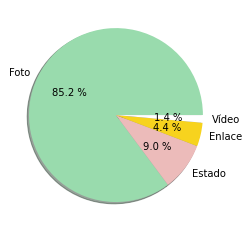

In [ ]:
plt.pie(data['Tipo'].value_counts(), shadow=True, autopct="%0.1f %%", labels=['Foto','Estado', 'Enlace', 'Vídeo'], colors=["#99DBAD", "#ECBBBA",  "#F7D31E","#ffffff"])
plt.show()

### Media
¿Cuál es la media de **comentarios, me gusta, compartidos y el total de interacciones** de las publicaciones?

In [ ]:
data['Comentarios'].mean() # Media de comentarios

7.482

In [ ]:
data['Me gusta'].mean() #Media de Me gusta

177.94589178356713

In [ ]:
data['Compartido'].mean() #Media de compartidos

27.266129032258064

In [ ]:
data['Total interacciones'].mean() #Media de total de interacciones

212.12

### Mediana
¿Cuál es la mediana de **mes, semana y hora de publicación**?
(Valor central de los datos)

In [ ]:
data['Mes de publicación'].median() #Mediana de mes de publicación

7.0

In [ ]:
data['Semana de publicación'].median() #Mediana de semana de publicación

4.0

In [ ]:
data['Hora de publicación'].median() #Mediana de hora de publicación

9.0

**¿La tendencia en las publicaciones se ha destacado por ser pagadas u orgánicas?**

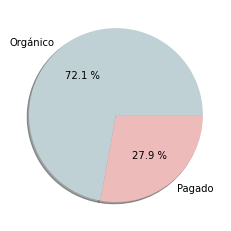

In [ ]:
plt.pie(data['Pagado'].value_counts(), shadow=True, autopct="%0.1f %%", labels=['Orgánico','Pagado'], colors=["#BFD1D4", "#ECBBBA"])
plt.show()

### Visualización de datos

El uso de diagramas facilita la comprensión visual de los datos ya que da un panorama de la variación o uniformidad de los mismos. 
 
¿Cómo se distribuyen los datos de interacciones con las publicaciones de la página?
 
A continuación se hará uso de **histogramas** para ver los datos correspondientes a **cometarios, me gusta, compartidos y total de interacciones** en las publicaciones 


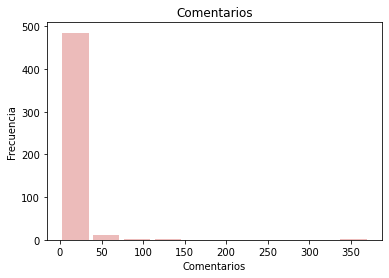

In [ ]:
#data['Comentarios'].hist()
plt.hist(x=data['Comentarios'], color='#ECBBBA', rwidth=0.85)
plt.title('Comentarios')
plt.xlabel('Comentarios')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

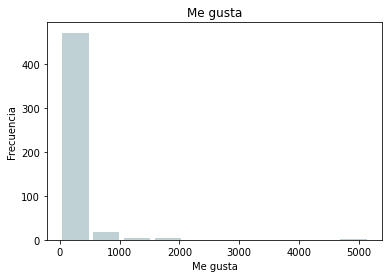

In [ ]:
plt.hist(x=data['Me gusta'], color='#BFD1D4', rwidth=0.85)
plt.title('Me gusta')
plt.xlabel('Me gusta')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

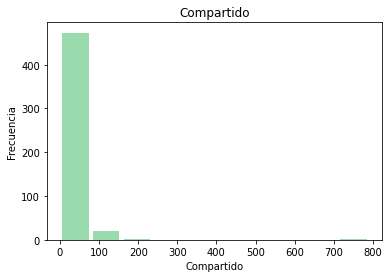

In [ ]:
plt.hist(x=data['Compartido'], color='#99DBAD', rwidth=0.85)
plt.title('Compartido')
plt.xlabel('Compartido')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

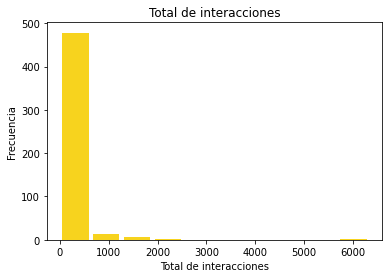

In [ ]:
plt.hist(x=data['Total interacciones'], color='#F7D31E', rwidth=0.85)
plt.title('Total de interacciones')
plt.xlabel('Total de interacciones')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

### Diagramas de caja
¿Donde se ubica la mayor parte de los valores del total de **likes en la página, alcance total en la vida de la publicación y del total de interacciones con las publicaciones**?

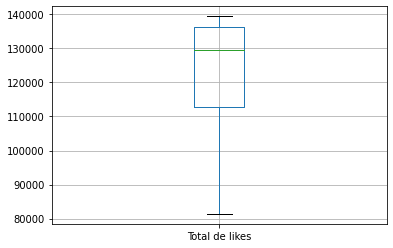

In [ ]:
data.boxplot(column='Total de likes') #Se encuentran entre 81000 y 137000

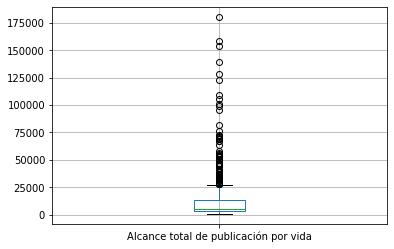

In [ ]:
data.boxplot(column='Alcance total de publicación por vida') #Su distribución es muy variada

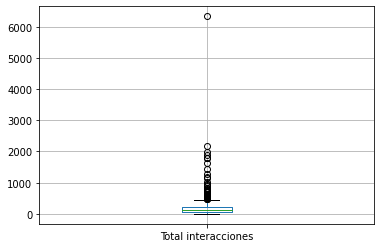

In [ ]:
data.boxplot(column='Total interacciones') #Su distribución es muy variada

### Gráfico de barras

¿Cómo se distribuye la **categoría** de las publicaciones?

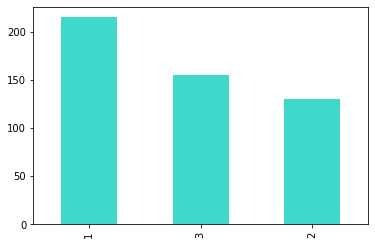

In [ ]:
data['Categoría'].value_counts().plot.bar(color=("#3ED9CA")) #Predomina la categoría 1

## **3.2 Análisis Bivariado (numérico y gráfico)**

¿Existe una relación directamente proporcional entre **comentarios y me gusta** de una publicación?

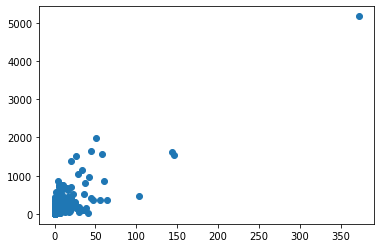

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data['Comentarios'], data['Me gusta'])
plt.show()
#Son proporcionales, ya que a más likes, más comentarios.
#En redes sociales, esto responde a que cuando se genera mayor interacciones, las publicaciones se imprimen en 
#repetidas veces a los mismo usuarios y crea una tendencia de reacción

¿Hay alguna relación entre el **Alcance total de publicación por vida** con las 
**Impresiones totales de publicación por vida**?

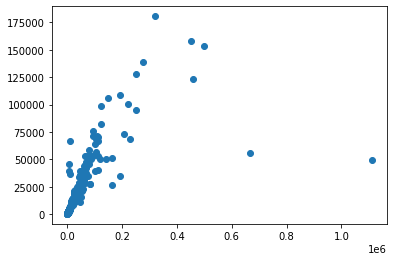

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data['Impresiones totales de publicación por vida'], data['Alcance total de publicación por vida'])
plt.show()
#Guardan estrecha relación dado que a que mayor impresiones, la posibilidad de mejor alcance aumenta

¿El hecho de que se pague o no una publicación está relacionado al mes del año en que se publique?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

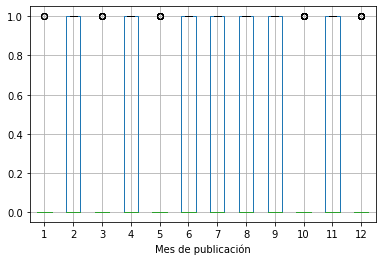

In [ ]:
data.boxplot(column='Pagado', by='Mes de publicación') #1: pagado, 0: orgánico
plt.title('')
plt.suptitle('')
#Se puede decir que depende de cierto modo. 
#Además, por marketing es posible que hagan publicidad de promociones

**¿Se ha logrado una mejor interacción con las publicaciones pagadas respecto a las órganicas?**

Se observa que en efecto, las publicaciones tienen una mejor interacción, esto puede responder a que se mejora el alcance llegando a otros públicos. Adicional se adjunta la comparación entre **Impresión de publicaciones respecto a si es pagada o no**

<function matplotlib.pyplot.show>

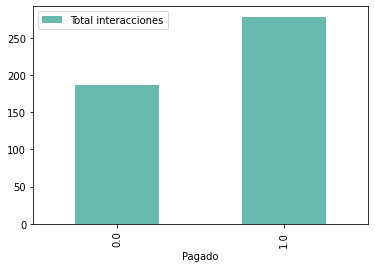

In [ ]:
data[['Pagado','Total interacciones']].groupby(['Pagado']).mean().plot.bar(color=("#67BAAD"))
plt.show

<function matplotlib.pyplot.show>

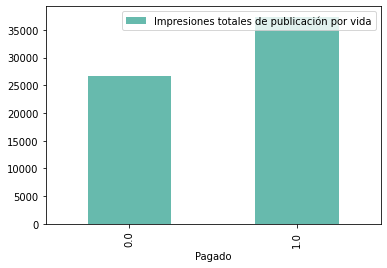

In [ ]:
data[['Pagado','Impresiones totales de publicación por vida']].groupby(['Pagado']).mean().plot.bar(color=("#67BAAD"))
plt.show

**¿El tipo de publicación a mejorado o disminuido el total de interacciones?**

El tipo de publicación vídeo tiene una mejor interacción, pero se debe tener en cuenta en es el tipo de publicación menos frecuente de la página por lo que no se puede considerar como fiable en la toma de decisiones que determine qué contenido seguir publicando

<function matplotlib.pyplot.show>

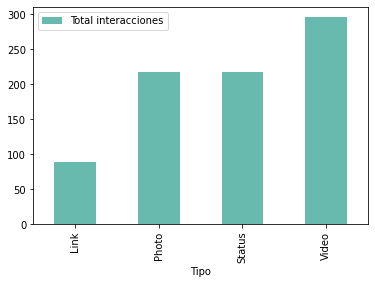

In [ ]:
data[['Tipo','Total interacciones']].groupby(['Tipo']).mean().plot.bar(color=("#67BAAD"))
plt.show

**¿Qué tipo de publicación a llegado a más comsumidores de publicaciones de por vida?**

Esto puede ayudar a determinar que tipo de publicación atrae más a la audiencia. En campañas de relaciones públicas, sirve mucho conocer el tipo de publicación que más agrada a la audiencia para enfocar la estrategia sobre este tipo de contenido sin perder la imagen comunicacional que ha caracterizado al sitio.

<function matplotlib.pyplot.show>

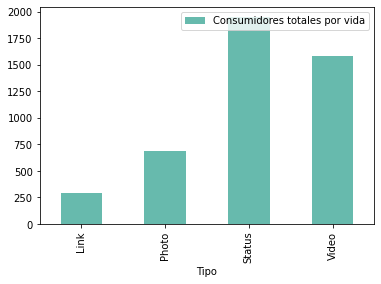

In [ ]:
data[['Tipo','Consumidores totales por vida']].groupby(['Tipo']).mean().plot.bar(color=("#67BAAD"))
plt.show

**¿Cuál es la relación entre consumidores alcanzados de forma orgánica frente a los pagados?**




<function matplotlib.pyplot.show>

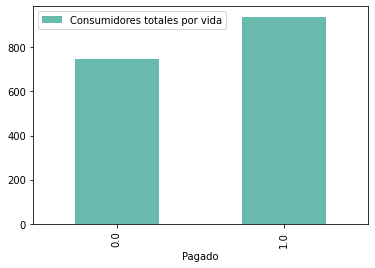

In [ ]:
data[['Pagado','Consumidores totales por vida']].groupby(['Pagado']).mean().plot.bar(color=("#67BAAD"))
plt.show

**¿Cuál es la relación  entre el tipo de publicación y la decisión de pagar publicidad o no?**




In [ ]:
#Pagado: {0: orgánico 1: Pagado}
pd.crosstab(data['Tipo'], data['Pagado'], margins = True).style.background_gradient(cmap = 'summer_r')


Pagado,0.0,1.0,All
Tipo,,,
Link,16,6,22
Photo,306,119,425
Status,35,10,45
Video,3,4,7
All,360,139,499


La mayor parte de las publicaciones tienen un alcance orgánico

En relación con la cantidad total de cada tipo de publicación, se observa que la mayoría de los videos han sido con publicidad pagada y con esto se entiende un poco mejor el gráfico anterior, donde las interacciones con vídeos superan a las otras

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


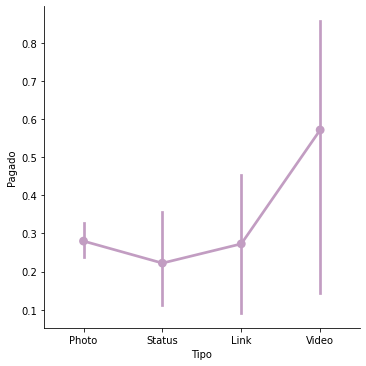

In [ ]:
sns.factorplot('Tipo','Pagado', data = data, color ='#C29DC2')

**¿Cuál es el tipo de publicación mejor distribuido entre las categorías de 
publicación?**

In [ ]:
#Pagado: {0: orgánico 1: Pagado}
pd.crosstab(data['Tipo'], data['Categoría'], margins = True).style.background_gradient(cmap = 'summer_r')

Categoría,1,2,3,All
Tipo,,,,
Link,20,1,1,22
Photo,185,91,150,426
Status,3,38,4,45
Video,7,0,0,7
All,215,130,155,500


Esto puede responder a la cantidad de publicaciones de cada tipo, pero la mejor distribuida es el tipo **Foto** mientras que **Vídeo** solo consta en 1

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


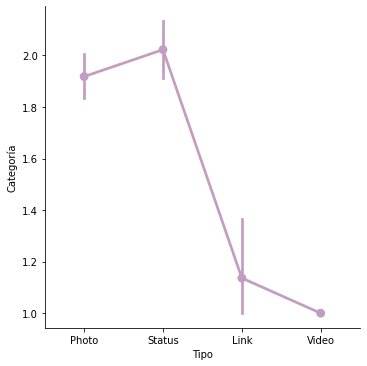

In [ ]:
sns.factorplot('Tipo','Categoría', data = data, color ='#C29DC2')

# **4. Conclusiones**

En el periodo de 1 año la página ha crecido en temas audiencia y personas que han expresado su interés por la misma, eso se puede evidenciar en la cantidad de personas a las que les gusta la página. Adicional a esto, es importante mencionar que las publicaciones que han predominado han sido de tipo “Foto” por sobre las otras publicaciones y el tipo de publicación “Vídeo” ha alcanzado un buen total de interacciones, esto podría responder al hecho de que 4 de los 7 vídeos han sido promocionados. El tipo de publicación mejor situado ha sido el tipo “Estado” por lo que en la estrategia de marketing y campaña de relaciones públicas se puede optar por enfocarse más a este tipo. La audiencia de la página es, en su mayoría, orgánica por lo que se puede decir que está muy bien posicionada. Adicionalmente, se puede hacer un análisis más detallado de las personas, tiempo e interacciones que alcanza cada tipo de publicación según su categoría y si es promocionada o no para determinar la línea a seguir. 

# **5. Referencias**

[DataSet](https://archive.ics.uci.edu/ml/datasets/Facebook+metrics)

[Estudio de donde se extrajo la data](https://www.sciencedirect.com/science/article/abs/pii/S0148296316000813?via%3Dihub)

[Funciones Python](https://docs.python.org/3/)